**Installation**

In [2]:
! git clone https://github.com/WangShaoRu/pose-diff.git
! cd pose-diff && git submodule update --init --recursive --remote
# 安装cmake
! wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
! tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
# 安装依赖文件
! cd pose-diff/openpose && chmod -R a+x ./scripts && ./scripts/ubuntu/install_deps.sh
# make
! cd pose-diff/openpose && mkdir build && cd build && cmake -DBUILD_PYTHON=ON -DDOWNLOAD_FACE_MODEL=OFF -DDOWNLOAD_HAND_MODEL=OFF ..
# build
! cd pose-diff/openpose/build/ && make -j`nproc`

Cloning into 'pose-diff'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 40 (delta 11), reused 35 (delta 9), pack-reused 0
Unpacking objects: 100% (40/40), done.
Submodule 'openpose' (https://github.com/CMU-Perceptual-Computing-Lab/openpose) registered for path 'openpose'
Cloning into '/content/pose-diff/openpose'...
Submodule path 'openpose': checked out 'b5bffe18a8021f5f3ed98f19441b658647d9a8c3'
Submodule '3rdparty/caffe' (https://github.com/CMU-Perceptual-Computing-Lab/caffe.git) registered for path 'openpose/3rdparty/caffe'
Submodule '3rdparty/pybind11' (https://github.com/pybind/pybind11.git) registered for path 'openpose/3rdparty/pybind11'
Cloning into '/content/pose-diff/openpose/3rdparty/caffe'...
Cloning into '/content/pose-diff/openpose/3rdparty/pybind11'...
Submodule path 'openpose/3rdparty/caffe': checked out 'c95002fb17c87c8150fbad1e7e8e3ea3cebc641f'
Submodule path 'openp

**Command line mode.**

You will find `ref.jpg` and `test.jpg` in `result/` if all right.

In [3]:
! cd pose-diff && python pose_diff.py --ref ./input/ref.jpg --test ./input/test.jpg

Starting OpenPose Python Wrapper...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.


**Here is an example of using Openpose and our PoseDiff module.**

Step 1: Import module


In [4]:
import sys, os
os.chdir('/content/pose-diff')
sys.path.append(os.path.join('./openpose/build/python'))
from openpose import pyopenpose as op
import cv2
import numpy as np
import matplotlib.pyplot as plt
from core import PoseDiff, PoseException
from core.pose_25 import VIS_KP
from utils import display_pose

Step 2: Run Openpose

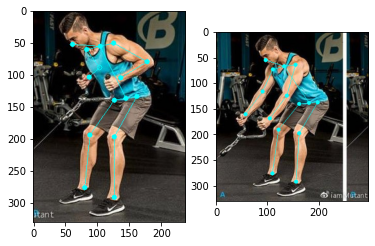

In [6]:
params = dict()
params['model_folder'] = os.path.join('./openpose/models')

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

# Process Reference Image and Display
datum = op.Datum()
ref_img_path = "./input/ref.jpg"
ref_img = cv2.imread(ref_img_path)
datum.cvInputData = ref_img
opWrapper.emplaceAndPop([datum])
ref_pose = datum.poseKeypoints[0][VIS_KP]
ref_img_with_pose = display_pose(ref_img, ref_pose, color=(255, 255, 0))
plt.subplot(1,2,1)
plt.imshow(ref_img_with_pose[:, :, ::-1])

# Process Test Image and Display
test_img_path = "./input/test.jpg"
test_img = cv2.imread(test_img_path)
datum.cvInputData = test_img
opWrapper.emplaceAndPop([datum])
test_pose = datum.poseKeypoints[0][VIS_KP]
test_img_with_pose = display_pose(test_img, test_pose, color=(255, 255, 0))
plt.subplot(1,2,2)
plt.imshow(test_img_with_pose[:, :, ::-1])

plt.show()

Step 3: Pose Diff

[0.8262240226637022, 0.9657682180404663, 0.7869050940038999, 0.24602233445242136, 0.08702662957952972, 0.8072728625923017, 0.1610397057797481, 0.11751167116899972, 1, 0.8525669171005035, 0.7935277841185449, 0.7028704743737908, 0.8450915256013047, 0.801543824033732, 0.7342223796331513]


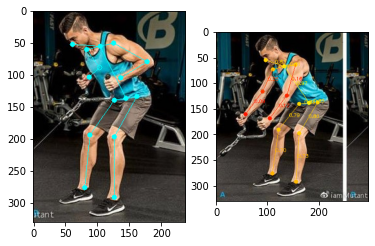

In [7]:
pd = PoseDiff()
try:
  scores = pd.pose_diff(ref_pose, test_pose)
except PoseException as e:
  print("Failed to matched! ", e)
  scores = None

print(scores)
test_img_with_pose_and_score = display_pose(test_img, test_pose, color=(0, 255, 255), scores=scores)

plt.subplot(1,2,1)
plt.imshow(ref_img_with_pose[:, :, ::-1])

plt.subplot(1,2,2)
plt.imshow(test_img_with_pose_and_score[:, :, ::-1])
plt.show()